<a href="https://colab.research.google.com/github/cdbm/F1DataAnalysis/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
circuits=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/circuits.csv")
constructor_results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_results.csv")
constructor_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_standings.csv")
constructors=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructors.csv")
driver_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/driver_standings.csv")
drivers=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/drivers.csv")
lap_times=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/lap_times.csv")
pit_stops=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/pit_stops.csv")
qualifying=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/qualifying.csv")
races=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/races.csv")
results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/results.csv")
seasons=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/seasons.csv")
status=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/status.csv")



# Normalização do sistema de pontuação
ao longo dos anos o modo como se pontuavam as corridas mudou, essa mudança entre temporadas pode mexer com resultados futuros, então é necessário uma padronização no sistema de pontuação.

In [3]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])

In [ ]:
from_58_to_59 = constructor_standings[(constructor_standings["year"] >= 1958) & (constructor_standings["year"] <= 1959)]
from_58_to_59["points_norm"] = (from_58_to_59['points'] - from_58_to_59['points'].min()) / (from_58_to_59['points'].max() - from_58_to_59['points'].min())

times_60 = constructor_standings[constructor_standings["year"] == 1960]
times_60["points_norm"] = (times_60['points'] - times_60['points'].min()) / (times_60['points'].max() - times_60['points'].min())

from_61_to_90 = constructor_standings[(constructor_standings["year"] >= 1961) & (constructor_standings["year"] <= 1990)]
from_61_to_90["points_norm"] = (from_61_to_90['points'] - from_61_to_90['points'].min()) / (from_61_to_90['points'].max() - from_61_to_90['points'].min())

from_91_to_02 = constructor_standings[(constructor_standings["year"] >= 1991) & (constructor_standings["year"] <= 2002)]
from_91_to_02["points_norm"] = (from_91_to_02['points'] - from_91_to_02['points'].min()) / (from_91_to_02['points'].max() - from_91_to_02['points'].min())

from_03_to_09 = constructor_standings[(constructor_standings["year"] >= 2003) & (constructor_standings["year"] <= 2009)]
from_03_to_09["points_norm"] = (from_03_to_09['points'] - from_03_to_09['points'].min()) / (from_03_to_09['points'].max() - from_03_to_09['points'].min())

from_10_to_18 = constructor_standings[(constructor_standings["year"] >= 2010) & (constructor_standings["year"] <= 2018)]
from_10_to_18["points_norm"] = (from_10_to_18['points'] - from_10_to_18['points'].min()) / (from_10_to_18['points'].max() - from_10_to_18['points'].min())

from_2019 = constructor_standings[constructor_standings["year"] >= 2019]
from_2019["points_norm"] = (from_2019['points'] - from_2019['points'].min()) / (from_2019['points'].max() - from_2019['points'].min())


points_norms = pd.concat([from_58_to_59, times_60, from_61_to_90, from_91_to_02, from_03_to_09, from_10_to_18, from_2019])
points_norms = points_norms.sort_values(by="constructorStandingsId")
constructor_standings["points_norm"] = points_norms["points_norm"]

In [121]:
points_norms

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,14.0,1,1,1,2008,0.053435,McLaren
1,2,18,2,8.0,3,3,0,2008,0.030534,BMW Sauber
2,3,18,3,9.0,2,2,0,2008,0.034351,Williams
3,4,18,4,5.0,4,4,0,2008,0.019084,Renault
4,5,18,5,2.0,5,5,0,2008,0.007634,Toro Rosso
...,...,...,...,...,...,...,...,...,...,...
12371,27538,1036,4,36.0,6,6,0,2020,0.048714,Renault
12372,27539,1036,51,2.0,8,8,0,2020,0.002706,Alfa Romeo
12373,27540,1036,3,0.0,10,10,0,2020,0.000000,Williams
12374,27541,1036,9,135.0,2,2,1,2020,0.182679,Red Bull


In [122]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,14.0,1,1,1,2008,0.053435,McLaren
1,2,18,2,8.0,3,3,0,2008,0.030534,BMW Sauber
2,3,18,3,9.0,2,2,0,2008,0.034351,Williams
3,4,18,4,5.0,4,4,0,2008,0.019084,Renault
4,5,18,5,2.0,5,5,0,2008,0.007634,Toro Rosso
...,...,...,...,...,...,...,...,...,...,...
12371,27538,1036,4,36.0,6,6,0,2020,0.048714,Renault
12372,27539,1036,51,2.0,8,8,0,2020,0.002706,Alfa Romeo
12373,27540,1036,3,0.0,10,10,0,2020,0.000000,Williams
12374,27541,1036,9,135.0,2,2,1,2020,0.182679,Red Bull


In [105]:
constructor_standings[constructor_standings.year == 1958].sort_values(by="constructorStandingsId")

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
9389,17759,765,87,8.0,1,1,1,1958,0.221374,Cooper
9388,17760,765,6,6.0,2,2,0,1958,0.038168,Ferrari
9387,17761,765,105,3.0,3,3,0,1958,0.061069,Maserati
9382,17762,766,87,16.0,1,1,2,1958,0.000000,Cooper
9381,17763,766,6,12.0,2,2,0,1958,0.568702,Ferrari
...,...,...,...,...,...,...,...,...,...,...
9246,17846,775,32,3.0,6,6,0,1958,0.019084,Team Lotus
9247,17847,775,118,48.0,1,1,6,1958,0.038168,Vanwall
9248,17848,775,125,0.0,8,8,0,1958,0.030534,Connaught
9249,17849,775,127,0.0,9,9,0,1958,0.038168,OSCA


In [6]:
constructor_standings["points_norm"].isnull().values.any()

False

Normalizando as pontuações para pilotos


In [7]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])

In [8]:
driver_standings.sort_values(by="year")

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year
27333,43537,838,666,0.0,61,61,0,1950
27521,43494,838,501,0.0,32,32,0,1950
27522,43485,838,661,0.0,62,62,0,1950
27523,43470,838,627,10.0,4,4,0,1950
27524,43471,838,619,0.0,22,22,0,1950
...,...,...,...,...,...,...,...,...
32599,69802,1031,8,0.0,14,14,0,2020
32598,69801,1031,848,0.0,13,13,0,2020
32597,69800,1031,826,0.0,12,12,0,2020
32610,69813,1032,832,13.0,7,7,0,2020


In [ ]:
drivers_from_50_to_59 = driver_standings[(driver_standings["year"] >= 1950) & (driver_standings["year"] <= 1959)]
drivers_from_50_to_59["points_norm"] = (drivers_from_50_to_59['points'] - drivers_from_50_to_59['points'].min()) / (drivers_from_50_to_59['points'].max() - drivers_from_50_to_59['points'].min())

drivers_times_60 = driver_standings[driver_standings["year"] == 1960]
drivers_times_60["points_norm"] = (drivers_times_60['points'] - drivers_times_60['points'].min()) / (drivers_times_60['points'].max() - drivers_times_60['points'].min())

drivers_from_61_to_90 = driver_standings[(driver_standings["year"] >= 1961) & (driver_standings["year"] <= 1990)]
drivers_from_61_to_90["points_norm"] = (drivers_from_61_to_90['points'] - drivers_from_61_to_90['points'].min()) / (drivers_from_61_to_90['points'].max() - drivers_from_61_to_90['points'].min())

drivers_from_91_to_02 = driver_standings[(driver_standings["year"] >= 1991) & (driver_standings["year"] <= 2002)]
drivers_from_91_to_02["points_norm"] = (drivers_from_91_to_02['points'] - drivers_from_91_to_02['points'].min()) / (drivers_from_91_to_02['points'].max() - drivers_from_91_to_02['points'].min())

drivers_from_03_to_09 = driver_standings[(driver_standings["year"] >= 2003) & (driver_standings["year"] <= 2009)]
drivers_from_03_to_09["points_norm"] = (drivers_from_03_to_09['points'] - drivers_from_03_to_09['points'].min()) / (drivers_from_03_to_09['points'].max() - drivers_from_03_to_09['points'].min())

drivers_from_10_to_18 = driver_standings[(driver_standings["year"] >= 2010) & (driver_standings["year"] <= 2018)]
drivers_from_10_to_18["points_norm"] = (drivers_from_10_to_18['points'] - drivers_from_10_to_18['points'].min()) / (drivers_from_10_to_18['points'].max() - drivers_from_10_to_18['points'].min())

drivers_from_2019 = driver_standings[driver_standings["year"] >= 2019]
drivers_from_2019["points_norm"] = (drivers_from_2019['points'] - drivers_from_2019['points'].min()) / (drivers_from_2019['points'].max() - drivers_from_2019['points'].min())


drivers_points_norms = pd.concat([drivers_from_50_to_59, drivers_times_60, drivers_from_61_to_90, drivers_from_91_to_02, drivers_from_03_to_09, drivers_from_10_to_18, drivers_from_2019])
drivers_points_norms = drivers_points_norms.sort_values(by="driverStandingsId")
driver_standings["points_norm"] = drivers_points_norms["points_norm"]

In [125]:
drivers_points_norms

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,10.0,1,1,1,2008,0.067568,hamilton
1,2,18,2,8.0,2,2,0,2008,0.054054,heidfeld
2,3,18,3,6.0,3,3,0,2008,0.040541,rosberg
3,4,18,4,5.0,4,4,0,2008,0.033784,alonso
4,5,18,5,4.0,5,5,0,2008,0.027027,kovalainen
...,...,...,...,...,...,...,...,...,...,...
32684,69927,1036,825,1.0,17,17,0,2020,0.002421,kevin_magnussen
32685,69928,1036,840,40.0,5,5,0,2020,0.096852,stroll
32686,69929,1036,817,20.0,10,10,0,2020,0.048426,ricciardo
32687,69930,1036,830,95.0,2,2,1,2020,0.230024,max_verstappen


In [128]:
driver_standings[driver_standings.year == 1991].sort_values(by="points_norm", ascending=False)

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,points_norm,name
7760,17610,320,102,96.0,1,1,7,1991,0.666667,senna
7752,17569,319,102,91.0,1,1,6,1991,0.631944,senna
7741,17530,318,102,85.0,1,1,6,1991,0.590278,senna
7730,17492,317,102,83.0,1,1,6,1991,0.576389,senna
7722,17454,316,102,77.0,1,1,6,1991,0.534722,senna
...,...,...,...,...,...,...,...,...,...,...
6668,17450,315,120,0.0,36,36,0,1991,0.000000,barbazza
6667,17451,315,65,0.0,24,24,0,1991,0.000000,herbert
6666,17452,315,143,0.0,37,37,0,1991,0.000000,bartels
6665,17453,315,30,0.0,34,34,0,1991,0.000000,michael_schumacher


In [12]:
drivers_points_norms.shape

(32689, 9)

# Circuitos


Esse dataset mostra uma descrição breve de todos os circuitos que já sediaram alguma corrida de fórmula 1 


In [13]:
circuits['circuitRef'] = circuits['circuitRef'].astype('category')
circuits['name'] = circuits['name'].astype('category')
circuits['location'] = circuits['location'].astype('category')
circuits['country'] = circuits['country'].astype('category')
circuits['alt'] = circuits['alt'].astype('category')

Descrição dos dados:

circuitId: categórico nominal <br/>
circuitRef: categórico nominal<br/>
name: categórico nominal<br/>
location: categórico nominal<br/>
country: categórico nominal<br/>
lat: Contínuo<br/>
lng: Contínuo<br/>
alt: categórico nominal </br>
url: categórico nominal <br/>


In [14]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [15]:
circuits.dtypes

circuitId        int64
circuitRef    category
name          category
location      category
country       category
lat            float64
lng            float64
alt           category
url             object
dtype: object

In [16]:
circuits['country'].cat.categories

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'China', 'France', 'Germany', 'Hungary', 'India',
       'Italy', 'Japan', 'Korea', 'Malaysia', 'Mexico', 'Monaco', 'Morocco',
       'Netherlands', 'Portugal', 'Russia', 'Singapore', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UAE', 'UK', 'USA',
       'Vietnam'],
      dtype='object')

Localização dos ciruitos no mapa


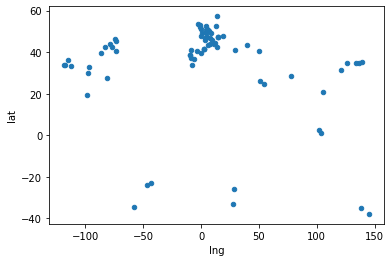

In [17]:
circuits.plot.scatter(x='lng', y='lat')

Países com mais circuitos a sediar uma corrida de fórmula 1


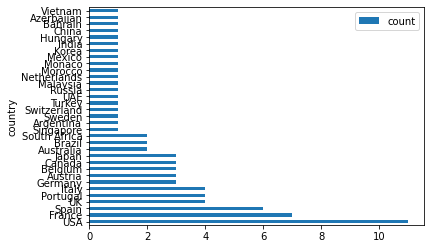

In [18]:
circuits.groupby(['country']).agg(['count'])["circuitId"].sort_values(by='count', ascending=False).plot.barh()

# Construtores


Esse dataset é reservado para mostrar informações das equipes que correm e correram na categoria.


In [19]:
constructors['constructorRef'] = constructors['constructorRef'].astype('category')
constructors['name'] = constructors['name'].astype('category')
constructors['nationality'] = constructors['nationality'].astype('category')

Descrição dos dados:

constructorId: categórico nominal <br/>
name: categórico nominal<br/>
nationality: categórico nominal<br/>



In [20]:
constructors.dtypes

constructorId        int64
constructorRef    category
name              category
nationality       category
url                 object
dtype: object

Países com mais equipes <br>
A diferença entre as equipes britânicas para o resto se da pelo fato da inglaterra ser o berço da fórmula 1 e além disso varias equipes escolhem a inglaterra como sede pela comodidade.

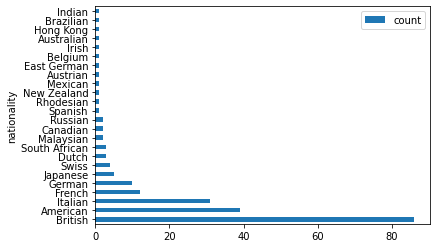

In [21]:
constructors.groupby(['nationality']).agg(['count'])['constructorRef'].sort_values(by='count', ascending=False).plot.barh()

# Resultados Construtores


Esse dataset mostra os resultados das equipes por corridas, mostrando a pontuação total em cada corrida disputada.

Descrição dos dados </br>
status: categórico binário


In [22]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [23]:
constructor_results.dtypes

constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

In [24]:
constructor_results["status"] = constructor_results["status"].astype("category")

In [25]:
constructor_results["status"].cat.categories

Index(['D', '\N'], dtype='object')

# Construtores Standings


o dataset de standings mostra uma visão de como a equipe está situada no campeonato após dada corrida, mostrando os pontos conquistados até aqui, corridas vencidas entre outros.

Descrção dos dados </br>
positionText: categórico nomimal


In [26]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm
0,1,18,1,14.0,1,1,1,2008,0.0
1,2,18,2,8.0,3,3,0,2008,0.0
2,3,18,3,9.0,2,2,0,2008,0.0
3,4,18,4,5.0,4,4,0,2008,0.0
4,5,18,5,2.0,5,5,0,2008,0.0


In [27]:
constructor_standings["positionText"] = constructor_standings["positionText"].astype("category")

In [28]:
constructor_standings["positionText"].cat.categories

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'E'],
      dtype='object')

In [29]:
constructor_standings.dtypes

constructorStandingsId       int64
raceId                       int64
constructorId                int64
points                     float64
position                     int64
positionText              category
wins                         int64
year                         int64
points_norm                float64
dtype: object

# Desempenho Construtores

In [123]:
constructor_standings[constructor_standings["year"] == 1973].groupby("name").agg("max").sort_values(by="points_norm", ascending=False)

,constructorStandingsId,raceId,constructorId,points,position,wins,year,points_norm
name,,,,,,,,
Team Lotus,22207.0,619.0,32.0,92.0,2.0,7.0,1973.0,0.462312
Tyrrell,22206.0,619.0,25.0,82.0,2.0,5.0,1973.0,0.412060
McLaren,22204.0,619.0,1.0,58.0,4.0,3.0,1973.0,0.291457
Brabham,22203.0,619.0,34.0,22.0,7.0,0.0,1973.0,0.110553
March,22201.0,619.0,37.0,14.0,10.0,0.0,1973.0,0.070352
...,...,...,...,...,...,...,...,...
Watson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wetteroth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Essa sessão é dedicada a uma análise de desempenho de várias equipes ao longo do tempo, suas pontuações, vitórias e comparações entre elas.

Análise de desempenho da ferrari durante os anos

In [30]:
ferrari_standings=constructor_standings[constructor_standings.constructorId == 6]
ferrari_standings.sort_values(by="raceId")
ferrari_standings.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins,year,points_norm
count,957.000000,957.000000,957.0,957.000000,957.000000,957.000000,957.000000,957.000000
mean,15762.467085,494.479624,6.0,82.415361,2.789969,1.939394,1992.231975,0.107482
std,8972.564223,297.638813,0.0,102.404158,1.928856,2.434172,17.397714,0.165725
min,6.000000,1.000000,6.0,0.000000,1.000000,0.000000,1958.000000,0.000000
25%,6508.000000,240.000000,6.0,17.000000,2.000000,0.000000,1978.000000,0.000000
50%,19352.000000,481.000000,6.0,43.000000,2.000000,1.000000,1993.000000,0.031674
75%,24364.000000,721.000000,6.0,100.000000,3.000000,3.000000,2007.000000,0.133333
max,27534.000000,1036.000000,6.0,571.000000,14.000000,15.000000,2020.000000,1.000000


O gráfico a seguir mostra a pontuação final por temporada de uma das equipes mais tradicionais da categoria, a ferrari. É útil observar que o grande aumento de pontos nas últimas décadas se da por mudanças de regulamento que passaram a dar mais pontos para as respectivas colocações

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


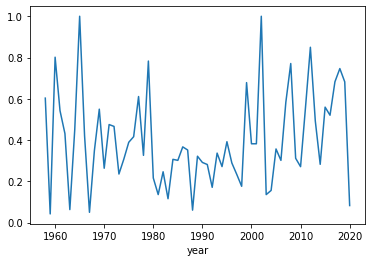

In [31]:
ferrari_standings["year"] = ferrari_standings.raceId.map(races.set_index("raceId")["year"])
ferrari_2019 = ferrari_standings[ferrari_standings.year == 2019]
ferrari_by_year = ferrari_standings.groupby(["year"]).agg("max")["points_norm"]
ferrari_by_year.plot()

Filtro na ferrari para comparar com red bull

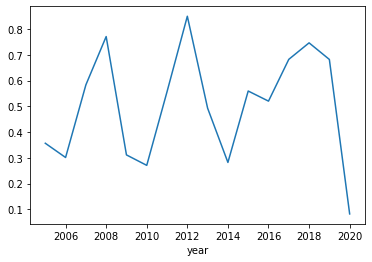

In [32]:
ferrari_from_2005 = ferrari_standings[ferrari_standings.year >= 2005]
ferrari_from_2005 = ferrari_from_2005.groupby(["year"]).agg("max")["points_norm"]
ferrari_from_2005.plot()

Análise de pountuação da Red Bull ao longo dos anos

In [33]:
rbr_standings=constructor_standings[constructor_standings.constructorId == 9]
rbr_standings.sort_values(by="raceId")
rbr_standings.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins,year,points_norm
count,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000
mean,20727.017123,631.287671,9.0,161.993151,3.356164,1.945205,2012.400685,0.156002
std,9595.577586,414.507739,0.0,154.877293,2.099713,2.665242,4.444434,0.170455
min,14.000000,1.000000,9.0,0.000000,1.000000,0.000000,2005.000000,0.000000
25%,24267.000000,74.750000,9.0,24.000000,2.000000,0.000000,2009.000000,0.000000
50%,25329.500000,879.500000,9.0,112.000000,3.000000,1.000000,2012.500000,0.092810
75%,26627.750000,963.250000,9.0,272.000000,5.000000,3.000000,2016.000000,0.271491
max,27541.000000,1036.000000,9.0,650.000000,11.000000,13.000000,2020.000000,0.645833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


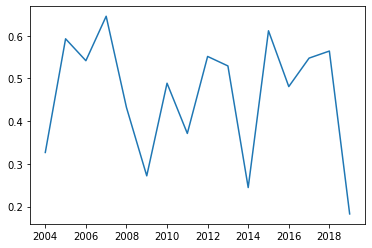

In [34]:
rbr_standings["year"] = rbr_standings.raceId.map(races.set_index("raceId")["year"])
rbr_year_2019 = rbr_standings[rbr_standings.year == 2019]
rbr_by_year = rbr_standings.groupby(["year"]).agg("max")["points_norm"]
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")

Análise de pontuação da mercedes ao longo dos anos

In [35]:
mercedes_standings=constructor_standings[constructor_standings.constructorId == 131]
mercedes_standings.sort_values(by="raceId")
mercedes_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm
10130,24235,337,131,18.0,3,3,0,2010,0.131679
10142,24247,338,131,29.0,3,3,0,2010,0.049618
10154,24259,339,131,44.0,4,4,0,2010,0.000000
10166,24271,340,131,60.0,4,4,0,2010,0.027451
10178,24283,341,131,72.0,4,4,0,2010,0.070588


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


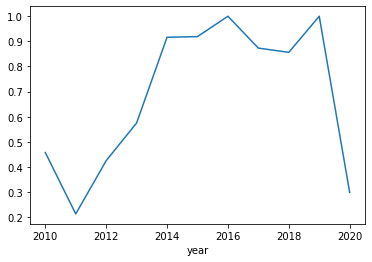

In [36]:
mercedes_standings["year"] = mercedes_standings.raceId.map(races.set_index("raceId")["year"])
mercedes_by_year = mercedes_standings.groupby(["year"]).agg("max")["points_norm"]
mercedes_by_year.plot()

Comparação de pontuação das 3 equipes mais influentes da categoria nos últimos anos


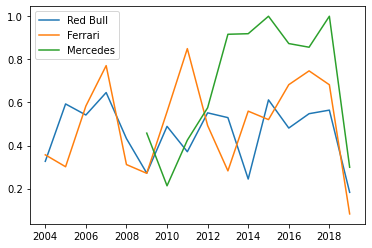

In [37]:
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")
plt.plot(np.arange(2004, 2020,1),ferrari_from_2005, label="Ferrari")
plt.plot(np.arange(2009, 2020, 1), mercedes_by_year, label="Mercedes")
plt.legend()
plt.show()

Análise de desempenho das equipes a partir do ano 2000


In [38]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])
constructor_standings["name"] = constructor_standings.constructorId.map(constructors.set_index("constructorId")["name"])
constructor_standings_from_2000 = constructor_standings[constructor_standings["year"] >= 2000]
constructor_standings_from_2000.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,14.0,1,1,1,2008,0.0,McLaren
1,2,18,2,8.0,3,3,0,2008,0.0,BMW Sauber
2,3,18,3,9.0,2,2,0,2008,0.0,Williams
3,4,18,4,5.0,4,4,0,2008,0.0,Renault
4,5,18,5,2.0,5,5,0,2008,0.0,Toro Rosso


In [39]:
names = constructor_standings_from_2000["name"].unique().tolist()

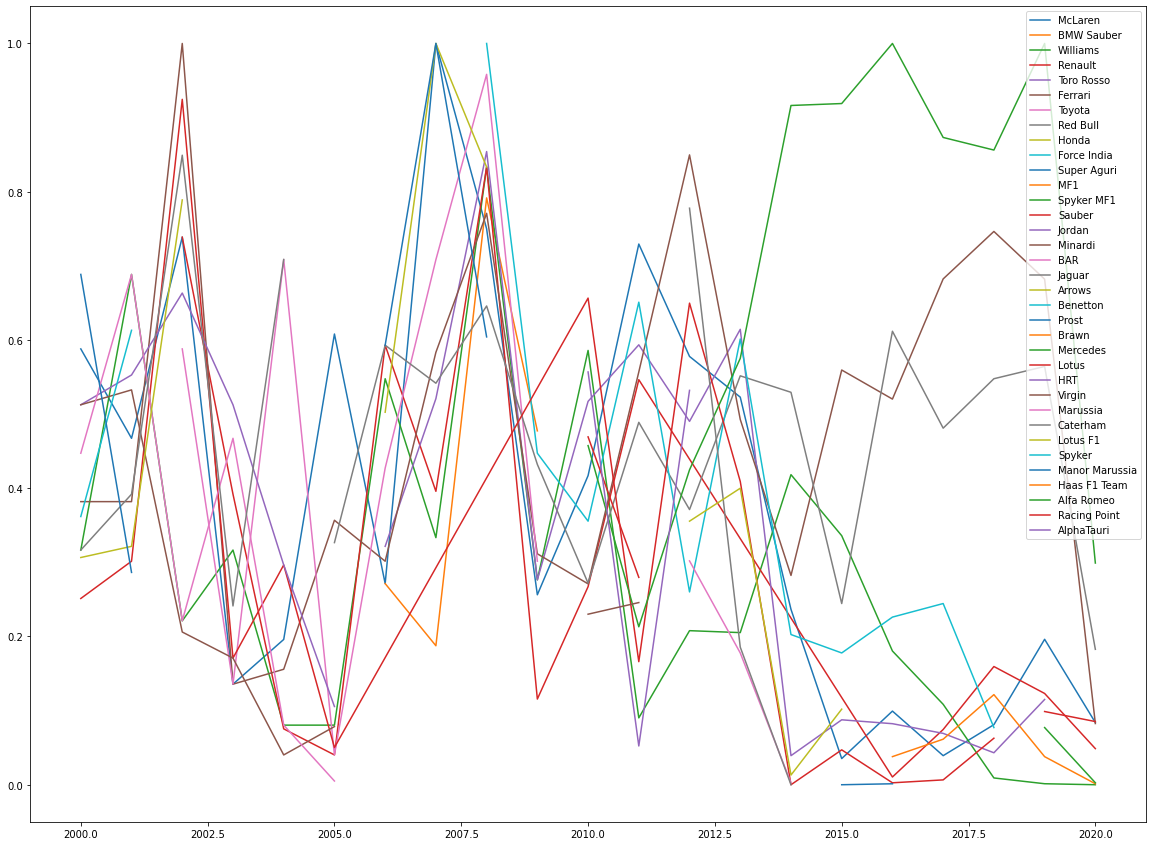

In [40]:
for name in names:
  x = constructor_standings_from_2000.loc[constructor_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  plt.plot(x.index, x.points_norm, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

# Pilotos


In [41]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Descrição dos tipos <br>
nationality: categórico nominal


In [42]:
drivers["nationality"] = drivers["nationality"].astype("category")

In [43]:
drivers["nationality"].cat.categories

Index(['American', 'American-Italian', 'Argentine', 'Argentine-Italian',
       'Australian', 'Austrian', 'Belgian', 'Brazilian', 'British', 'Canadian',
       'Chilean', 'Colombian', 'Czech', 'Danish', 'Dutch', 'East German',
       'Finnish', 'French', 'German', 'Hungarian', 'Indian', 'Indonesian',
       'Irish', 'Italian', 'Japanese', 'Liechtensteiner', 'Malaysian',
       'Mexican', 'Monegasque', 'New Zealander', 'Polish', 'Portuguese',
       'Rhodesian', 'Russian', 'South African', 'Spanish', 'Swedish', 'Swiss',
       'Thai', 'Uruguayan', 'Venezuelan'],
      dtype='object')

In [44]:
drivers.dtypes

driverId          int64
driverRef        object
number           object
code             object
forename         object
surname          object
dob              object
nationality    category
url              object
dtype: object

Quantidade de pilotos por nacionalidade

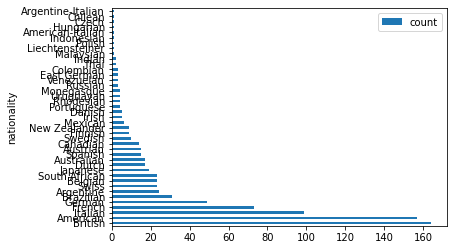

In [45]:
drivers.groupby(['nationality']).agg(['count'])['driverRef'].sort_values(by='count', ascending=False).plot.barh()

# Pilotos Standings


Descrção dos dados </br>
positionText: categórico nomimal

In [129]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,10.0,1,1,1,2008,0.067568,hamilton
1,2,18,2,8.0,2,2,0,2008,0.054054,heidfeld
2,3,18,3,6.0,3,3,0,2008,0.040541,rosberg
3,4,18,4,5.0,4,4,0,2008,0.033784,alonso
4,5,18,5,4.0,5,5,0,2008,0.027027,kovalainen


In [130]:
driver_standings["positionText"] = driver_standings["positionText"].astype("category") 

In [131]:
driver_standings["positionText"].cat.categories

Index(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
       ...
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'D'],
      dtype='object', length=109)

In [49]:
driver_standings.dtypes

driverStandingsId       int64
raceId                  int64
driverId                int64
points                float64
position                int64
positionText         category
wins                    int64
year                    int64
points_norm           float64
dtype: object

Gráfico de desempenho dos pilotos com pelo menos uma vitória a partir do ano 2000

In [132]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])
driver_standings["name"] = driver_standings.driverId.map(drivers.set_index("driverId")["driverRef"])
driver_standings_from_2000 = driver_standings[driver_standings["year"] >= 2000]
driver_standings_from_2000.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,points_norm,name
0,1,18,1,10.0,1,1,1,2008,0.067568,hamilton
1,2,18,2,8.0,2,2,0,2008,0.054054,heidfeld
2,3,18,3,6.0,3,3,0,2008,0.040541,rosberg
3,4,18,4,5.0,4,4,0,2008,0.033784,alonso
4,5,18,5,4.0,5,5,0,2008,0.027027,kovalainen


In [133]:
names = driver_standings_from_2000["name"].unique().tolist()

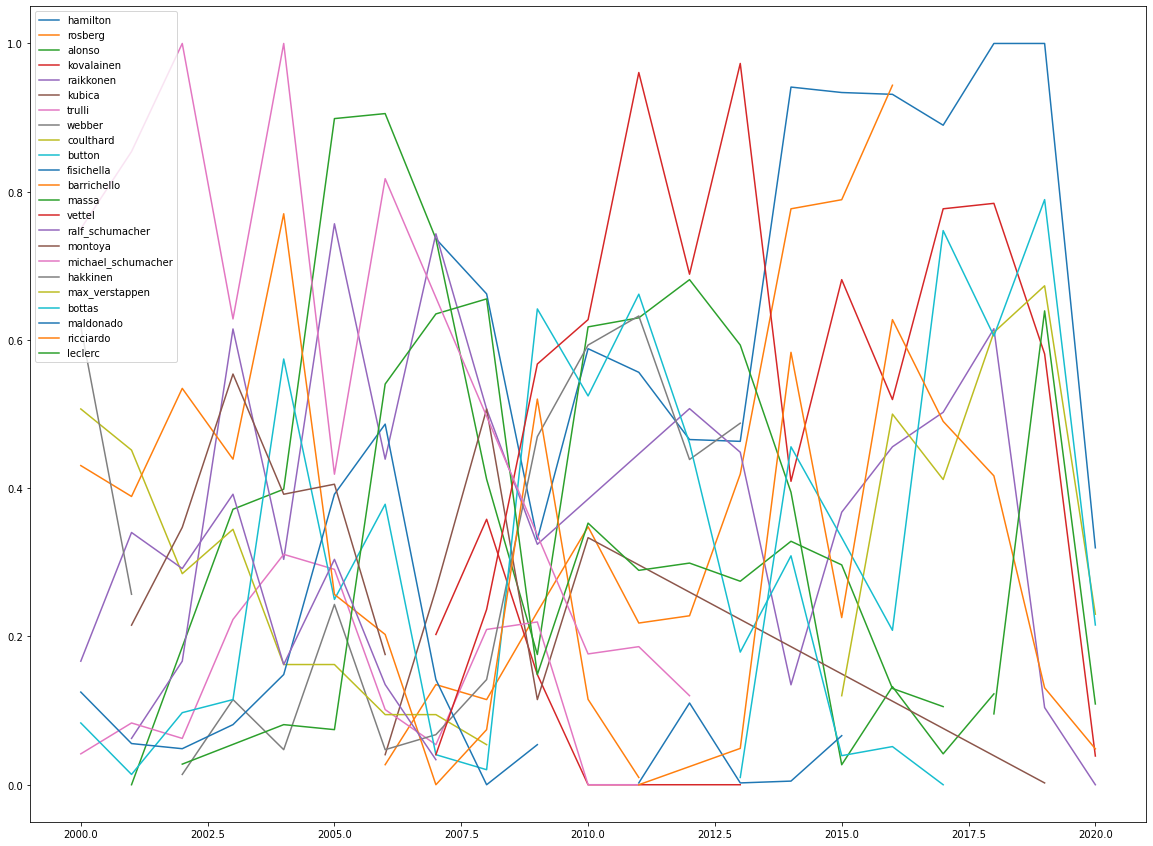

In [134]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.points_norm, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

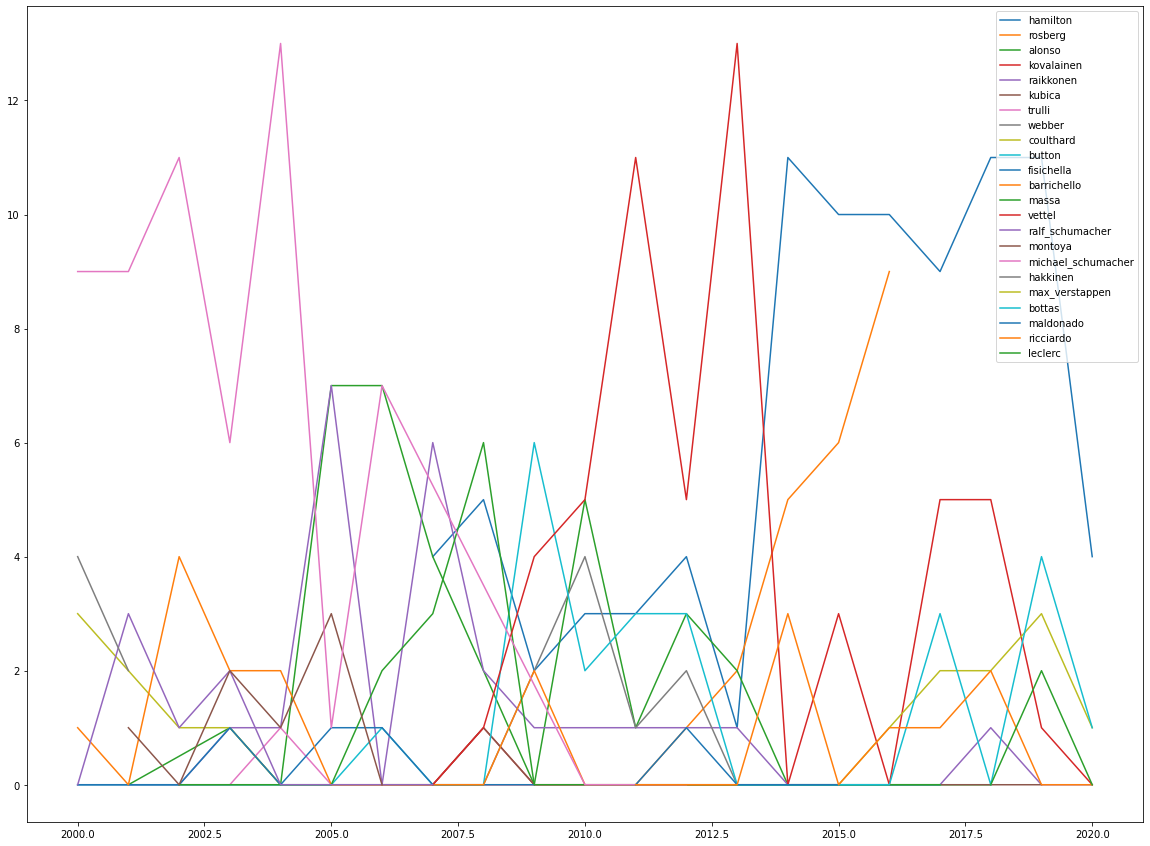

In [135]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.wins, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

In [136]:
driver_standings.set_index("points", inplace=True, drop=False)

A pergunta vem a tona, o numero de vitórias é relevante para ser campeão do mundial de pilotos? (A partir de 2010)


In [137]:
years = driver_standings["year"].unique()
years

array([2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 2017, 1991, 1990, 2009, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2018, 2019, 2020])

In [138]:
champions_by_year = [driver_standings[driver_standings["year"] == year].groupby("driverId").agg("max").sort_values(by="points", ascending=False).iloc[0] for year in years] 
champions_by_year = pd.DataFrame(champions_by_year)
champions_by_year.sort_values(by="year")

,driverStandingsId,raceId,points,position,wins,year,points_norm,name
642,43539,839,30.0,3,3,1950,0.714286,farina
579,44049,832,31.0,2,3,1951,0.738095,fangio
647,44669,824,36.0,52,6,1952,0.857143,ascari
647,45286,816,34.5,1,5,1953,0.821429,ascari
579,52049,807,42.0,1,6,1954,1.000000,fangio
...,...,...,...,...,...,...,...,...
3,68132,968,385.0,2,9,2016,0.943627,rosberg
1,68585,988,363.0,2,9,2017,0.889706,hamilton
1,69110,1009,408.0,2,11,2018,1.000000,hamilton
1,69750,1030,413.0,2,11,2019,1.000000,hamilton


In [139]:
champions_by_year["win_percentage"] = champions_by_year["wins"] / champions_by_year.year.map(races.groupby("year").agg("count")["raceId"])
champions_by_year.sort_values(by="year")

,driverStandingsId,raceId,points,position,wins,year,points_norm,name,win_percentage
642,43539,839,30.0,3,3,1950,0.714286,farina,0.428571
579,44049,832,31.0,2,3,1951,0.738095,fangio,0.375000
647,44669,824,36.0,52,6,1952,0.857143,ascari,0.750000
647,45286,816,34.5,1,5,1953,0.821429,ascari,0.555556
579,52049,807,42.0,1,6,1954,1.000000,fangio,0.666667
...,...,...,...,...,...,...,...,...,...
3,68132,968,385.0,2,9,2016,0.943627,rosberg,0.428571
1,68585,988,363.0,2,9,2017,0.889706,hamilton,0.450000
1,69110,1009,408.0,2,11,2018,1.000000,hamilton,0.523810
1,69750,1030,413.0,2,11,2019,1.000000,hamilton,0.523810


In [140]:
correlations = champions_by_year.corr(method="spearman")

In [143]:
correlations["win_percentage"]["points_norm"]

0.4277243160195616

# Tempos de Voltas

In [61]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [62]:
lap_times.dtypes

raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

#Pit Stops


In [63]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [64]:
pit_stops.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

# Qualificação


In [65]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [66]:
qualifying.dtypes

qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

# Corridas

Descrição dos dados </br>
name: categórico nominal


In [67]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [68]:
races["name"] = races["name"].astype("category")

In [69]:
races["name"].cat.categories

Index(['70th Anniversary Grand Prix', 'Abu Dhabi Grand Prix',
       'Argentine Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix',
       'Azerbaijan Grand Prix', 'Bahrain Grand Prix', 'Belgian Grand Prix',
       'Brazilian Grand Prix', 'British Grand Prix',
       'Caesars Palace Grand Prix', 'Canadian Grand Prix',
       'Chinese Grand Prix', 'Dallas Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Eifel Grand Prix', 'Emilia Romagna Grand Prix',
       'European Grand Prix', 'French Grand Prix', 'German Grand Prix',
       'Hungarian Grand Prix', 'Indian Grand Prix', 'Indianapolis 500',
       'Italian Grand Prix', 'Japanese Grand Prix', 'Korean Grand Prix',
       'Luxembourg Grand Prix', 'Malaysian Grand Prix', 'Mexican Grand Prix',
       'Monaco Grand Prix', 'Moroccan Grand Prix', 'Pacific Grand Prix',
       'Pescara Grand Prix', 'Portuguese Grand Prix', 'Russian Grand Prix',
       'San Marino Grand Prix', 'Singapore Grand Prix',
       'South African G

In [70]:
races.dtypes

raceId          int64
year            int64
round           int64
circuitId       int64
name         category
date           object
time           object
url            object
dtype: object

#Resultados


In [71]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [72]:
results["positionText"] = results["positionText"].astype("category")

In [73]:
results.dtypes

resultId              int64
raceId                int64
driverId              int64
constructorId         int64
number               object
grid                  int64
position             object
positionText       category
positionOrder         int64
points              float64
laps                  int64
time                 object
milliseconds         object
fastestLap           object
rank                 object
fastestLapTime       object
fastestLapSpeed      object
statusId              int64
dtype: object

In [74]:
results["positionText"].cat.categories

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '32', '33', '4', '5', '6', '7', '8', '9', 'D', 'E', 'F', 'N', 'R',
       'W'],
      dtype='object')

#Temporadas


In [75]:
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
